In [2]:
from google.colab import files
uploaded = files.upload()

Saving heart_2022_with_nans.csv to heart_2022_with_nans.csv


In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
filename = list(uploaded.keys())[0]
data = pd.read_csv(filename)
df = pd.DataFrame(data)
df

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,Virgin Islands,Female,Good,0.0,3.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,1.65,69.85,25.63,NaN,Yes,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
445128,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
445129,Virgin Islands,Female,Poor,30.0,30.0,5 or more years ago,No,5.0,1 to 5,No,...,1.70,49.90,17.23,NaN,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
445130,Virgin Islands,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,5.0,None of them,Yes,...,1.83,108.86,32.55,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes


In [86]:
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


Target column is "HadHeartAttack"

In [87]:
df.shape

(445132, 40)

In [88]:
#display all dataset columns
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [90]:
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,434205.000000,436065.000000,439679.000000,416480.000000,403054.000000,396326.000000
mean,4.347919,4.382649,7.022983,1.702691,83.074470,28.529842
std,8.688912,8.387475,1.502425,0.107177,21.448173,6.554889
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


In [91]:
df.duplicated().sum()

157

In [92]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [93]:
df.isnull().sum()

State                            0
Sex                              0
GeneralHealth                 1193
PhysicalHealthDays           10922
MentalHealthDays              9062
LastCheckupTime               8301
PhysicalActivities            1088
SleepHours                    5448
RemovedTeeth                 11355
HadHeartAttack                3060
HadAngina                     4400
HadStroke                     1552
HadAsthma                     1768
HadSkinCancer                 3138
HadCOPD                       2214
HadDepressiveDisorder         2807
HadKidneyDisease              1921
HadArthritis                  2628
HadDiabetes                   1082
DeafOrHardOfHearing          20502
BlindOrVisionDifficulty      21419
DifficultyConcentrating      24095
DifficultyWalking            23867
DifficultyDressingBathing    23770
DifficultyErrands            25511
SmokerStatus                 35316
ECigaretteUsage              35514
ChestScan                    55900
RaceEthnicityCategor

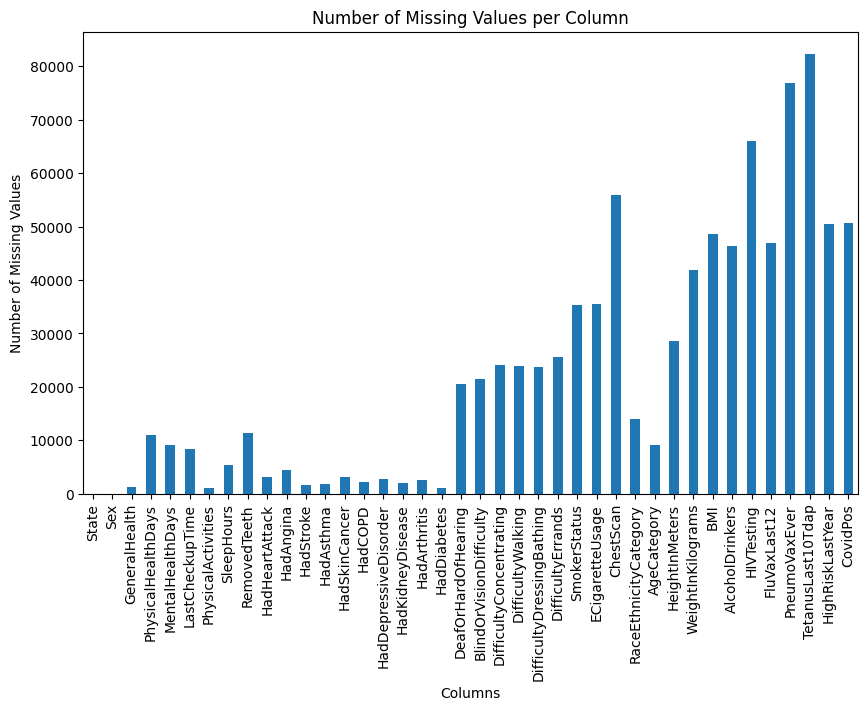

In [94]:
missing_values = df.isnull().sum()

# Plot the results
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
plt.title('Number of Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()

In [95]:
# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns # mode only
print("Numerical Columns:")
print(numerical_columns)
print("\nCategorical Columns:")
print(categorical_columns)

Numerical Columns:
Index(['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours',
       'HeightInMeters', 'WeightInKilograms', 'BMI'],
      dtype='object')

Categorical Columns:
Index(['State', 'Sex', 'GeneralHealth', 'LastCheckupTime',
       'PhysicalActivities', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'],
      dtype='object')


In [96]:
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)
for col in numerical_columns:
    df[col].fillna(df[col].mean(), inplace=True)

In [97]:
df.isnull().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

In [98]:
#see unique values and analysis the data
for col in df.select_dtypes(include="object"):
    print(col)
    print("***")
    print(df[col].value_counts())
    print("**********************************************************")

State
***
State
Washington              26142
New York                17784
Minnesota               16816
Ohio                    16482
Maryland                16410
Texas                   14237
Florida                 13385
Wisconsin               11273
Kansas                  11243
Massachusetts           11027
California              10948
Maine                   10646
Indiana                 10459
Virginia                10414
Arizona                 10184
Michigan                10054
South Carolina          10034
Utah                     9823
Connecticut              9771
Colorado                 9361
Georgia                  9234
Iowa                     8948
Vermont                  8801
New Jersey               8196
Hawaii                   7747
Nebraska                 7472
Missouri                 7438
South Dakota             7423
Montana                  7047
New Hampshire            6754
Idaho                    6280
Rhode Island             5891
Alaska                  

HadHeartAttack
No     419867
Yes     25108
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of Heart Attack Cases')

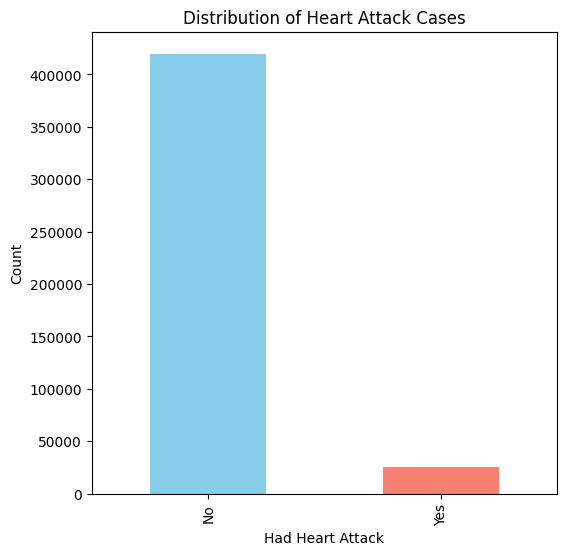

In [99]:
value_counts = df['HadHeartAttack'].value_counts()
print(value_counts)
# Plotting
plt.figure(figsize=(6, 6))
value_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.xlabel('Had Heart Attack')
plt.ylabel('Count')
plt.title('Distribution of Heart Attack Cases')

DATA IS NOT BALANCE

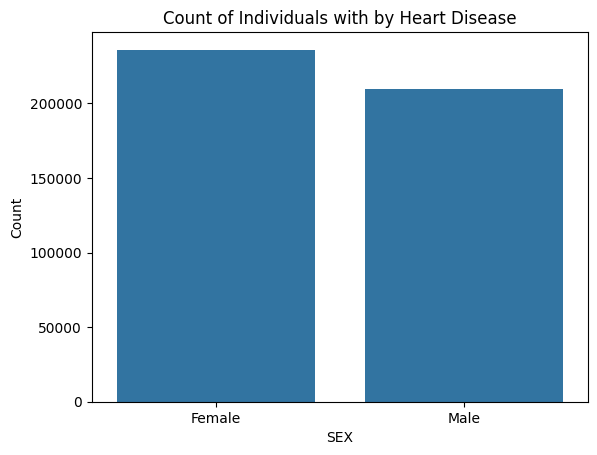

In [107]:
sex_count= df['Sex'].value_counts()
# Plot the data
sns.barplot(x=sex_count.index, y=sex_count.values)
plt.xlabel('SEX')
plt.ylabel('Count')
plt.title('Count of Individuals with by Heart Disease')
plt.show()

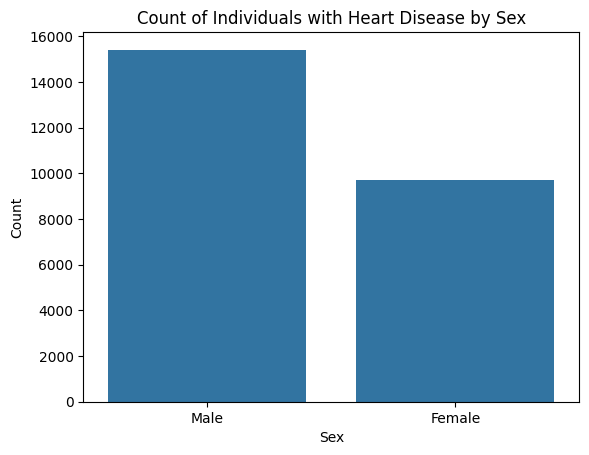

In [108]:
sex_heart_count = df['Sex'][df['HadHeartAttack'] == 'Yes'].value_counts()

# Plot the data
sns.barplot(x=sex_heart_count.index, y=sex_heart_count.values)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Count of Individuals with Heart Disease by Sex')
plt.show()

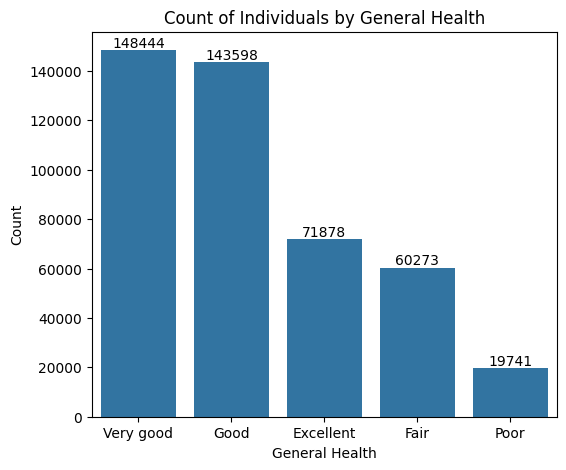

In [109]:
generalH_count =df['GeneralHealth'].value_counts()

# Plot the data
plt.figure(figsize=(6, 5))
ax = sns.barplot(x=generalH_count.index, y=generalH_count.values)

# Annotate the bars with the count values
for i, v in enumerate(generalH_count.values):
    ax.text(i, v + 1, str(v), ha='center', va='bottom')

plt.xlabel('General Health')
plt.ylabel('Count')
plt.title('Count of Individuals by General Health')
plt.show()

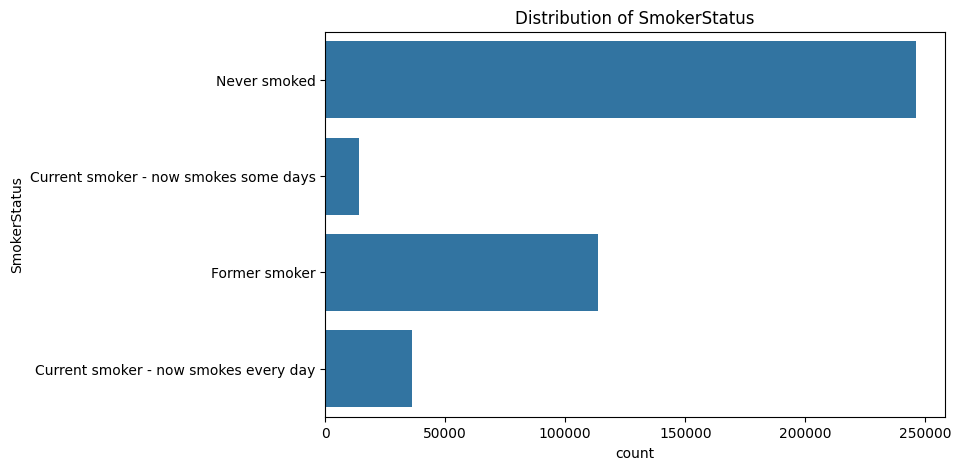

In [114]:
plt.figure(figsize=(8, 5))
sns.countplot(y=df['SmokerStatus'])
plt.title('Distribution of SmokerStatus')
plt.show()

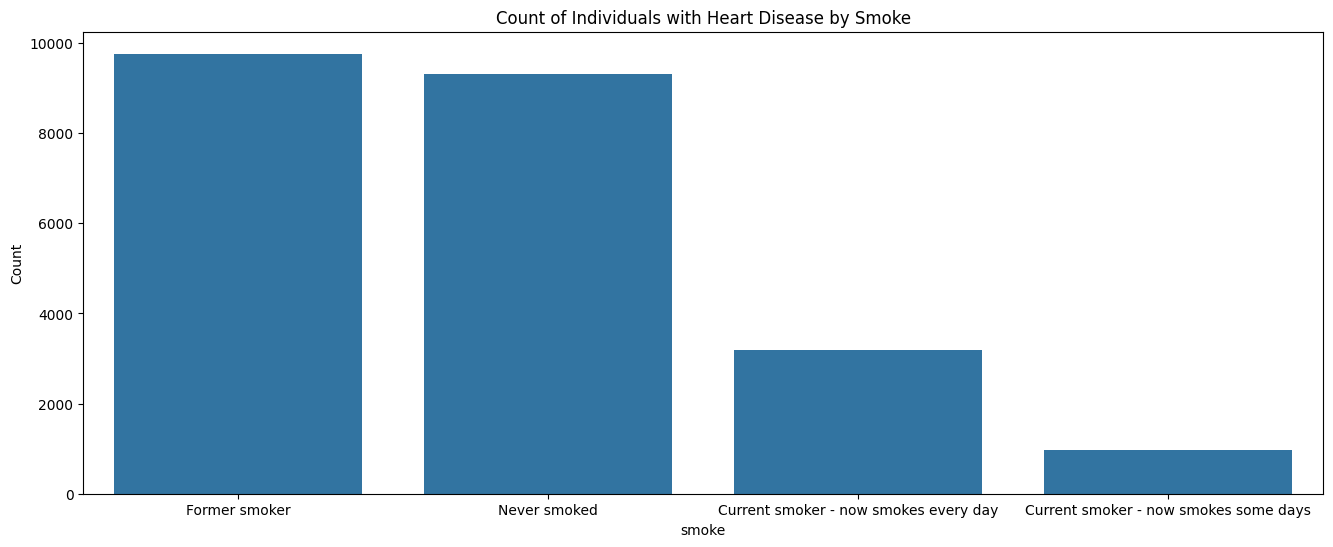

In [122]:
smokers_heart_count = df['SmokerStatus'][df['HadHeartAttack'] == 'Yes'].value_counts()

# Plot the data
plt.figure(figsize=(16,6))
sns.barplot(x=smokers_heart_count.index, y=smokers_heart_count.values)
plt.xlabel('smoke')
plt.ylabel('Count')
plt.title('Count of Individuals with Heart Disease by Smoke')
plt.show()

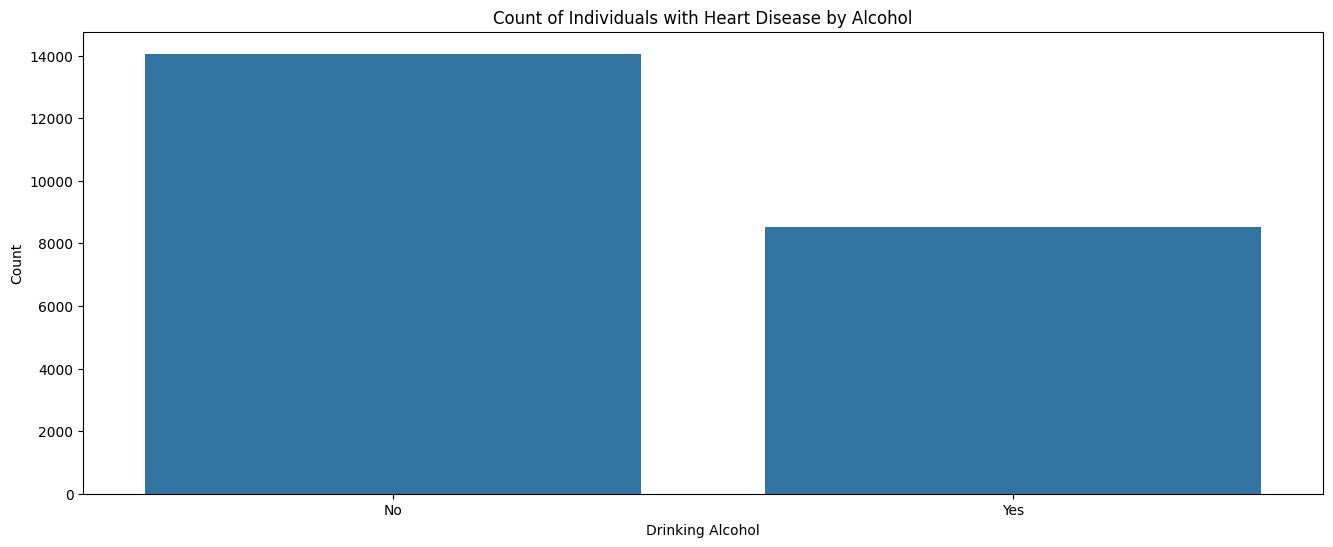

In [138]:
ALco_heart_count = df['AlcoholDrinkers'][df['HadHeartAttack'] == 'Yes'].value_counts()

# Plot the data
plt.figure(figsize=(16,6))
sns.barplot(x=ALco_heart_count.index, y=ALco_heart_count.values)
plt.xlabel('Drinking Alcohol')
plt.ylabel('Count')
plt.title('Count of Individuals with Heart Disease by Alcohol')
plt.show()

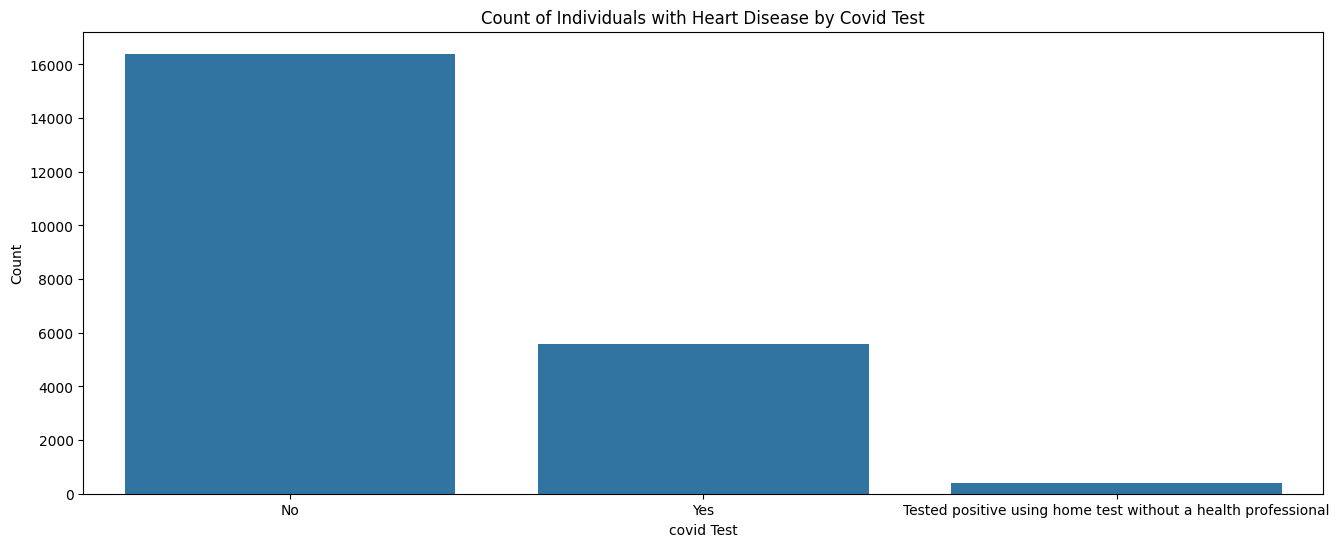

In [130]:
covid_heart_count = df['CovidPos'][df['HadHeartAttack'] == 'Yes'].value_counts()
# Plot the data
plt.figure(figsize=(16,6))
sns.barplot(x=covid_heart_count.index, y=covid_heart_count.values)
plt.xlabel('covid Test')
plt.ylabel('Count')
plt.title('Count of Individuals with Heart Disease by Covid Test')
plt.show()

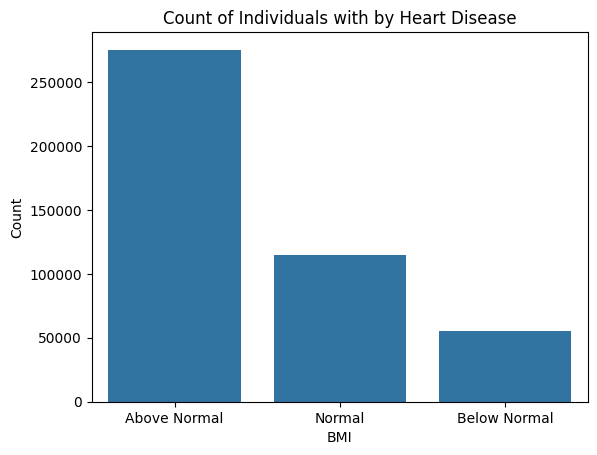

In [141]:
def bmi_category(bmi):
    if bmi > 24.9:
        return 'Above Normal'
    elif bmi >= 18.5 and bmi <= 24.9:
        return 'Normal'
    else:
        return 'Below Normal'

df['bmi_category'] = df['BMI'].apply(bmi_category)


BMI_count= df['bmi_category'].value_counts()
# Plot the data
sns.barplot(x=BMI_count.index, y=BMI_count.values)
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('Count of Individuals with by Heart Disease')
plt.show()




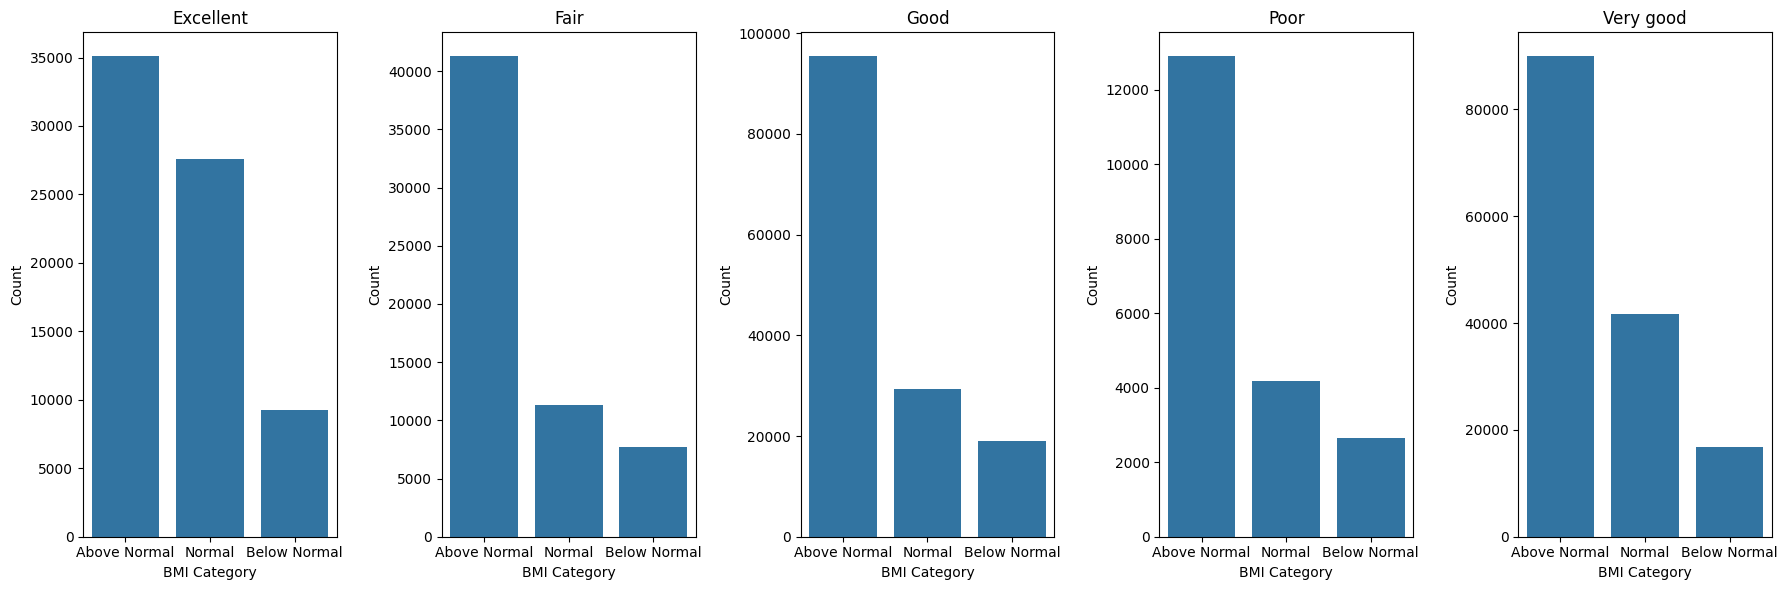

In [143]:
gh = df.groupby('GeneralHealth')
df['bmi_category'] = df['BMI'].apply(bmi_category)

# Create subplots for BMI categories
fig, axes = plt.subplots(1, 5, figsize=(18, 6))  # Adjusted figure size

for i, (g, group) in enumerate(gh):
    x_counts = group['bmi_category'].value_counts()

    # Plot the data
    sns.barplot(x=x_counts.index, y=x_counts.values, ax=axes[i])
    axes[i].set_xlabel('BMI Category')
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'{g}')

plt.tight_layout()
plt.show()

# Remove the 'bmi_category' column to revert to the original state
df.drop(columns='bmi_category', inplace=True)

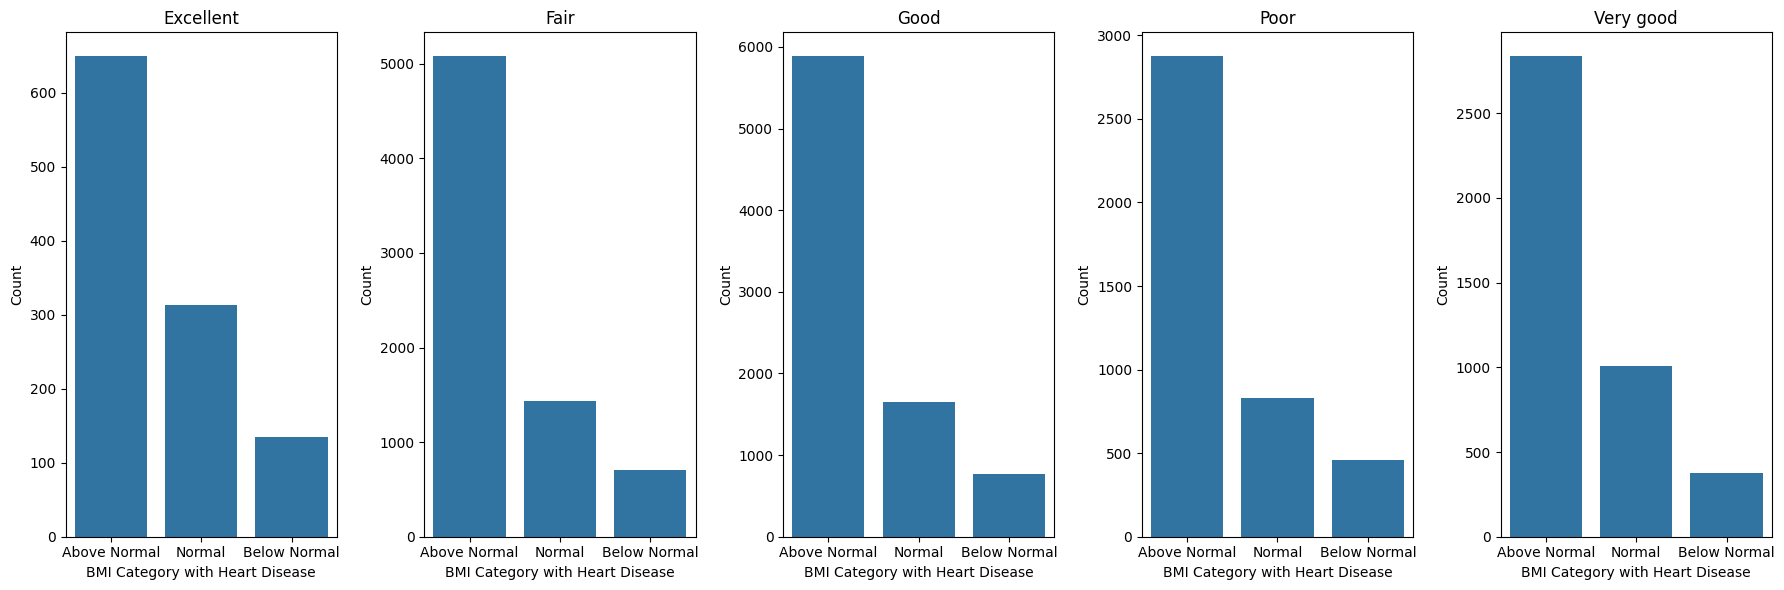

In [146]:
df['bmi_category'] = df['BMI'].apply(bmi_category)

# Create subplots for BMI categories
fig, axes = plt.subplots(1, 5, figsize=(18, 6))  # Adjusted figure size

for i, (g, group) in enumerate(gh):
    x_counts = group['bmi_category'][group['HadHeartAttack'] == 'Yes'].value_counts()

    # Plot the data
    sns.barplot(x=x_counts.index, y=x_counts.values, ax=axes[i])
    axes[i].set_xlabel('BMI Category with Heart Disease')
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'{g}')


plt.tight_layout()
plt.show()

# Remove the 'bmi_category' column to revert to the original state
df.drop(columns='bmi_category', inplace=True)

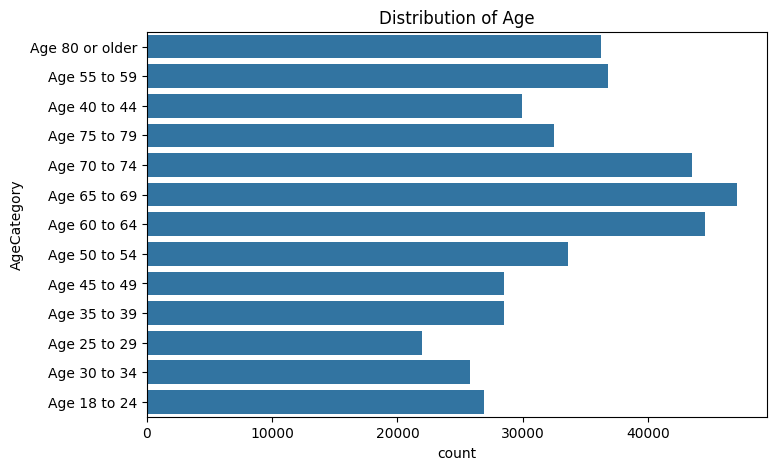

In [152]:
plt.figure(figsize=(8, 5))
sns.countplot(y=df['AgeCategory'])
plt.title('Distribution of Age')
plt.show()

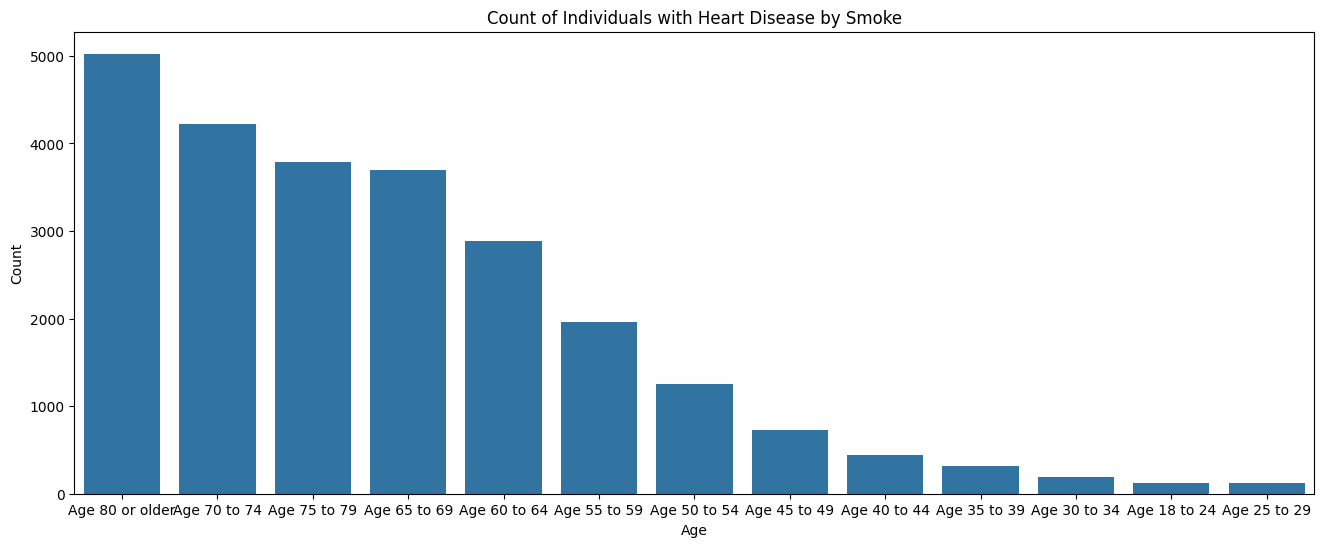

In [155]:
age_heart_count = df['AgeCategory'][df['HadHeartAttack'] == 'Yes'].value_counts()

# Plot the data
plt.figure(figsize=(16,6))
sns.barplot(x=age_heart_count.index, y=age_heart_count.values)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Count of Individuals with Heart Disease by Smoke')
plt.show()

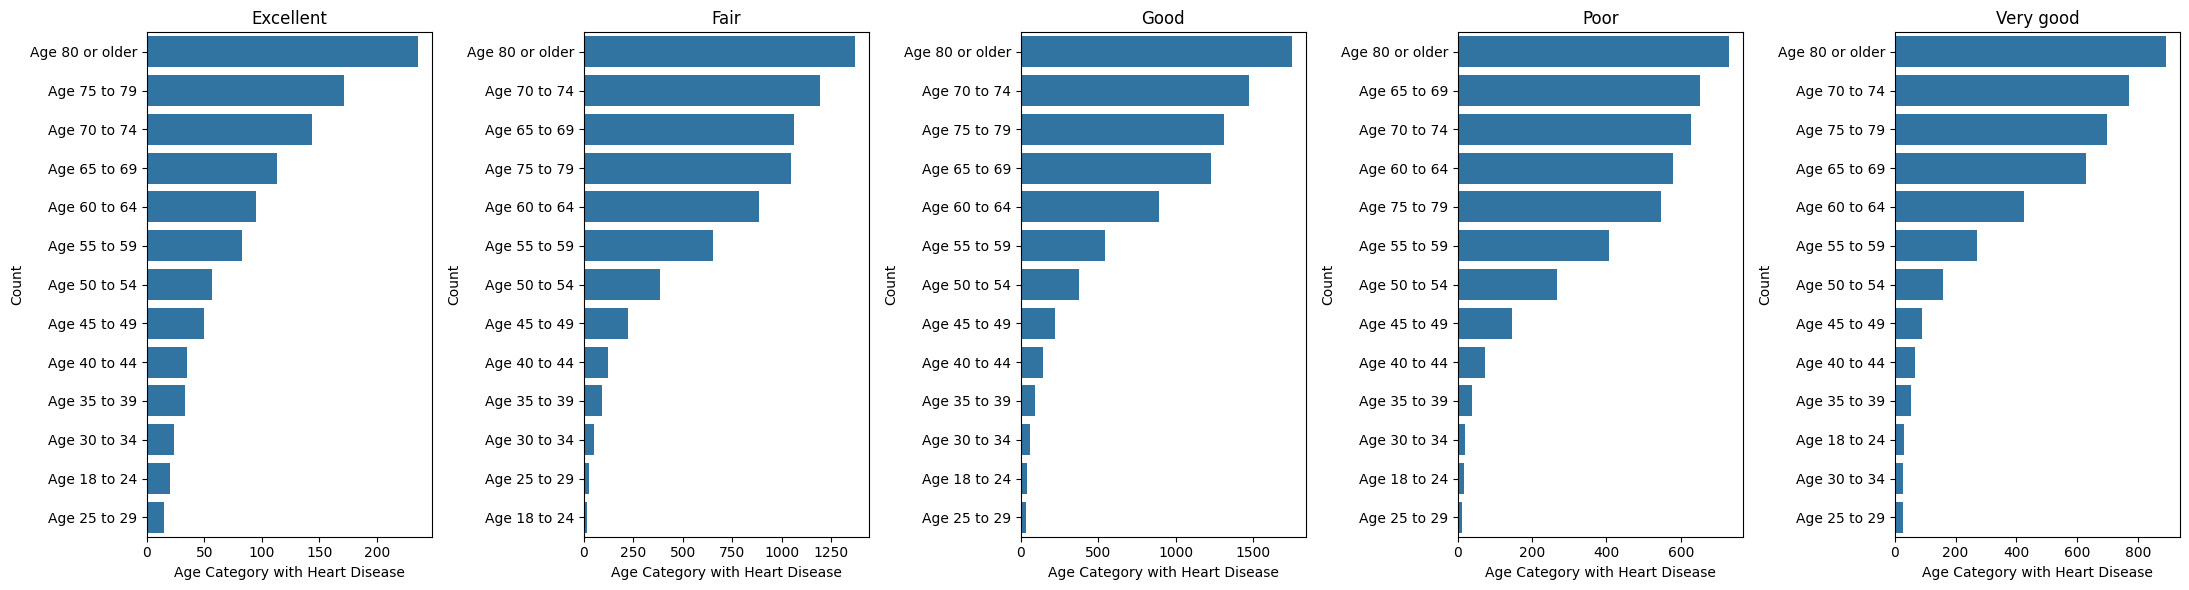

In [156]:
fig, axes = plt.subplots(1, 5, figsize=(22, 6))  # Adjusted figure size

for i, (g, group) in enumerate(g_gh):
    x_counts = group['AgeCategory'][group['HadHeartAttack'] == 'Yes'].value_counts()

    # Plot the data
    sns.barplot(y=x_counts.index, x=x_counts.values, ax=axes[i] , orient='h')
    axes[i].set_xlabel('Age Category with Heart Disease')
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'{g}')

plt.tight_layout()
plt.show()

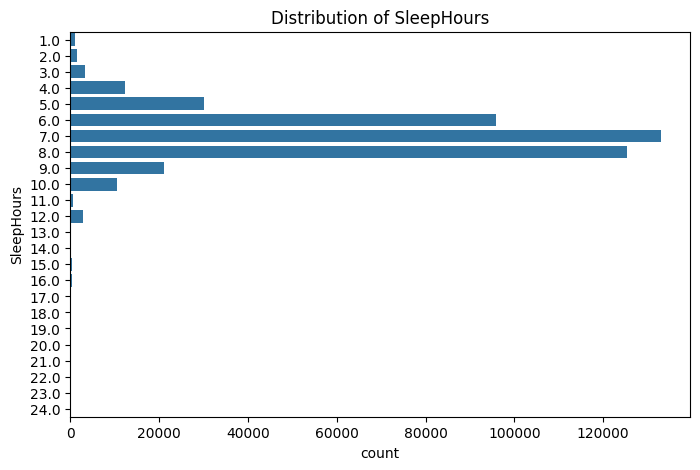

In [158]:
plt.figure(figsize=(8, 5))
sns.countplot(y=df['SleepHours'])
plt.title('Distribution of SleepHours')
plt.show()

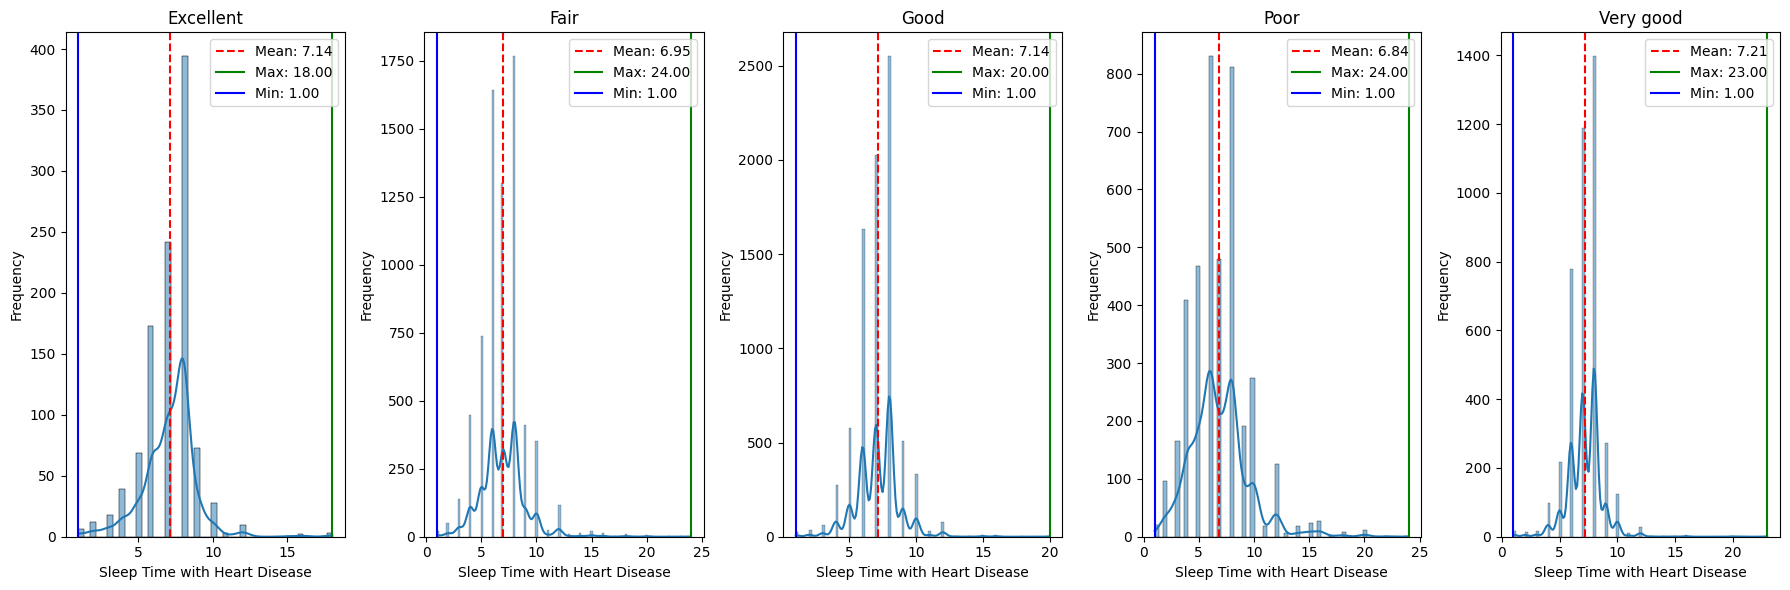

In [157]:
fig, axes = plt.subplots(1, 5, figsize=(18, 6))

for i, (g, group) in enumerate(gh):

    x = group['SleepHours'][group['HadHeartAttack'] == 'Yes']

    # Plot the data
    sns.histplot(x, kde=True, ax=axes[i])
    axes[i].axvline(x.mean(), color='r', linestyle='--', label=f'Mean: {x.mean():.2f}')
    axes[i].axvline(x.max(), color='g', linestyle='-', label=f'Max: {x.max():.2f}')
    axes[i].axvline(x.min(), color='b', linestyle='-', label=f'Min: {x.min():.2f}')
    axes[i].set_xlabel('Sleep Time with Heart Disease')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'{g}')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,0,0,4,0.0,0.0,3,0,8.0,3,0,...,1.70269,83.074632,28.529907,0,0,1,0,2,0,0
1,0,0,0,0.0,0.0,3,0,6.0,3,0,...,1.60000,68.040000,26.570000,0,0,0,0,0,0,0
2,0,0,4,2.0,3.0,3,1,5.0,3,0,...,1.57000,63.500000,25.610000,0,0,0,0,0,0,2
3,0,0,0,0.0,0.0,3,1,7.0,3,0,...,1.65000,63.500000,23.300000,0,0,1,1,0,0,0
4,0,0,1,2.0,0.0,3,1,9.0,3,0,...,1.57000,53.980000,21.770000,1,0,0,1,0,0,0


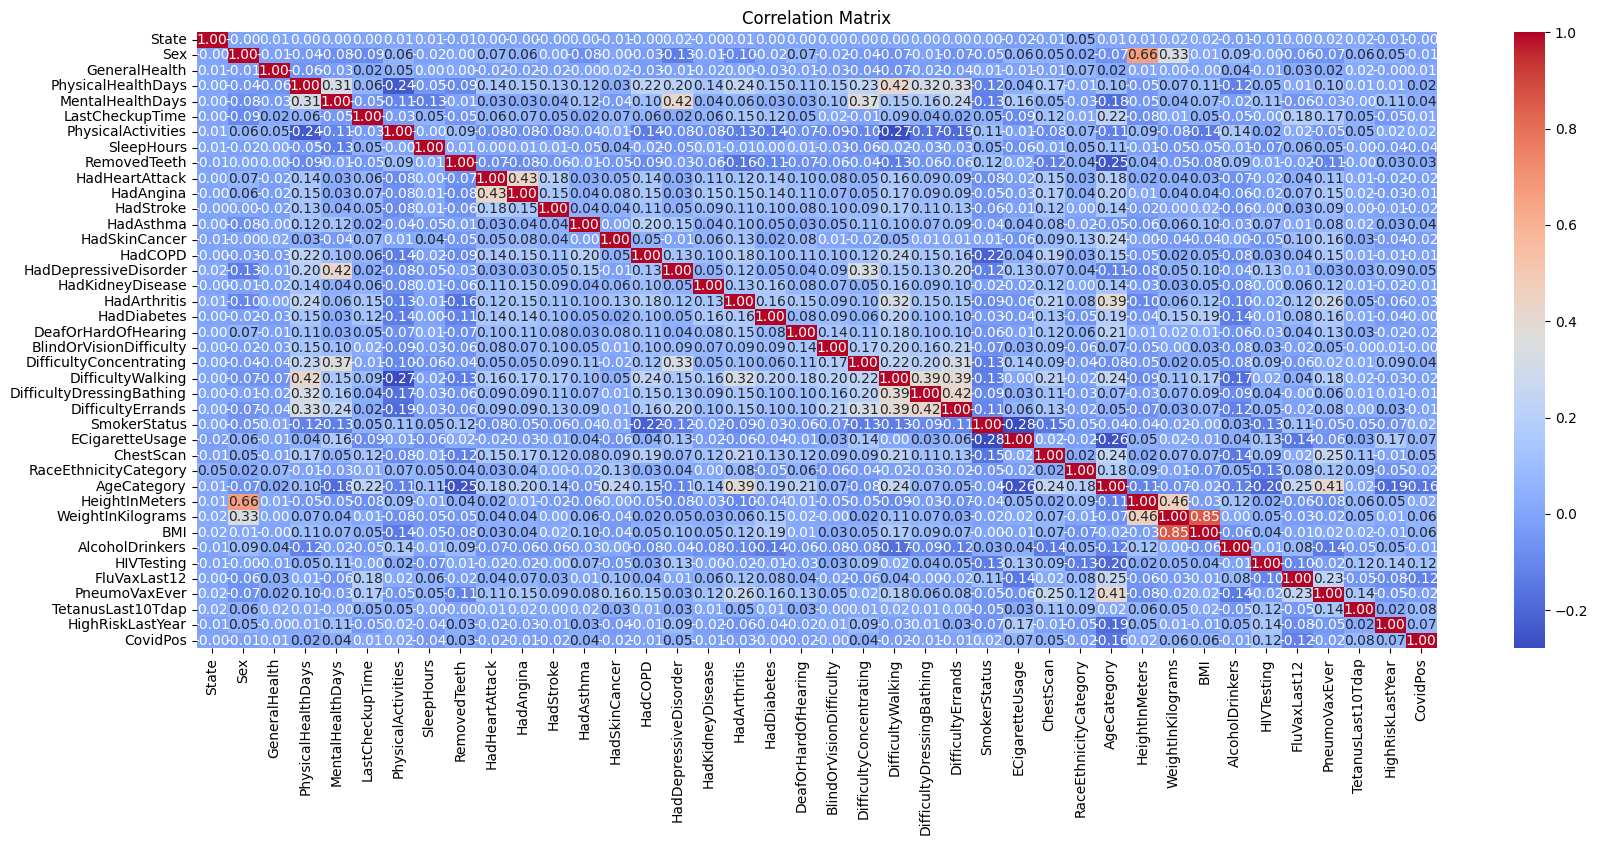

In [72]:
corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
X = df.drop('HadHeartAttack', axis=1)
y = df['HadHeartAttack']
print(y.value_counts())
smote = SMOTE(k_neighbors=2)
X_resampled, y_resampled = smote.fit_resample(X, y)
print('Resampled dataset shape:', y_resampled.value_counts())

HadHeartAttack
0    419867
1     25108
Name: count, dtype: int64
Resampled dataset shape: HadHeartAttack
0    419867
1    419867
Name: count, dtype: int64


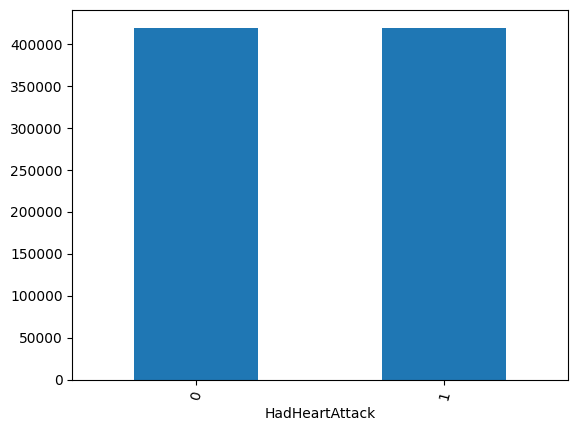

In [ ]:
y_resampled.value_counts().plot(kind = 'bar', rot = 75)
plt.show()

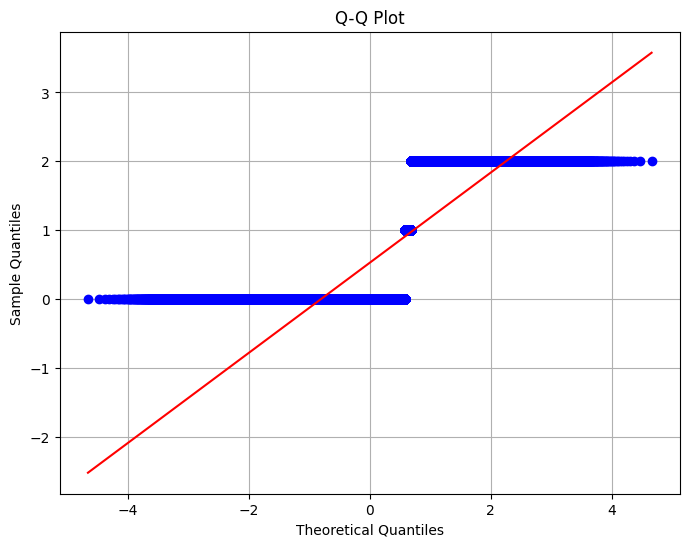

In [76]:
import scipy.stats as stats
plt.figure(figsize=(8, 6))
stats.probplot(df[column], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

There are outliers in the data

In [77]:
#normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_resampled = scaler.fit_transform(X_resampled)

In [81]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.9643750595635185


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     84122
           1       0.97      0.96      0.96     83766

    accuracy                           0.96    167888
   macro avg       0.96      0.96      0.96    167888
weighted avg       0.96      0.96      0.96    167888

[[81404  2718]
 [ 3263 80503]]


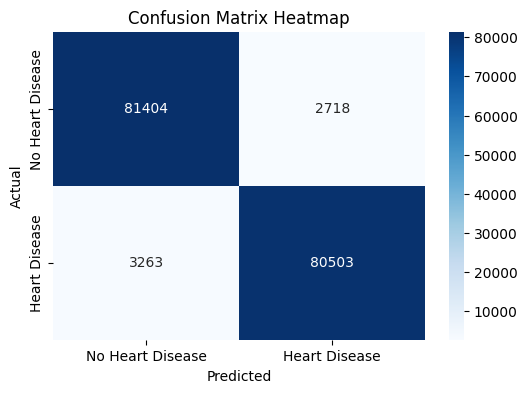

In [80]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()